# QOSF APPLICATION 
## Task 2 
Implement a circuit that returns |01> and |10> with equal probability.

### Requirements :

-The circuit should consist only of CNOTs, RXs and RYs. 

-Start from all parameters in parametric gates being equal to 0 or randomly chosen. 

-You should find the right set of parameters using gradient descent (you might use more advanced optimization methods if you like). 

-Simulations must be done with sampling - i.e. a limited number of measurements per iteration and noise. 

-Compare the results for different numbers of measurements: 1, 10, 100, 1000. 

### Bonus question:

How to make sure you produce state |01> + |10> and not |01> - |10> ?



# Notebook Imports 

In [1]:
   
from qiskit import * 
from qiskit.visualization import *
S_simulator=Aer.backends(name='statevector_simulator')[0]
M_simulator=Aer.backends(name='qasm_simulator')[0]

import matplotlib.pyplot as plt
from numpy import pi,e 
import numpy as np 

from mpl_toolkits.mplot3d.axes3d import Axes3D 

%matplotlib inline

In [2]:
qiskit.version

<module 'qiskit.version' from 'C:\\Users\\scien\\Anaconda3\\lib\\site-packages\\qiskit\\version.py'>

## Review Qiskit 



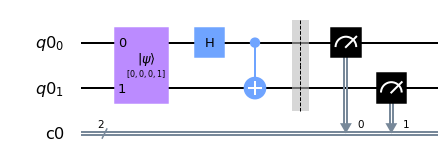

In [3]:
'''
We see that in a simple two qubit system initialzing in |01> |11> yields thesi + and psi minus bell states,
which gives us desired states in equal probabilities. The test circuit is used here to see how one would do
this task without restrictions placed upon them. We have to start from where we know to learn what we dont. 

How can I use Rx and Ry to subsitute the H gate? That is the first problem to tackle in this Task. 

''' 
test1=QuantumRegister(2)
test2=ClassicalRegister(2)
test=QuantumCircuit(test1,test2)

test.initialize([0,0,0,1], [test1[0],test1[1]]) # Initialize | 0 1 > or | 1 0 >  then apply h then cx to get psi+ or psi-

test.h(0)
test.cx(0,1)
test.barrier()
test.measure(0,0)
test.measure(1,1)

test.draw(output='mpl')

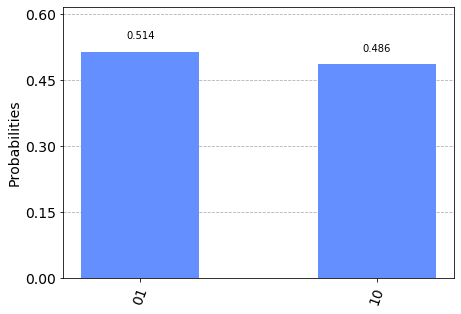

In [4]:
# Check That the test circuit does what it is supposed to

test_job=execute(test, M_simulator)
hist=test_job.result().get_counts()
plot_histogram(hist)

## Take a look at $Rx(\theta)$ and $Ry(\theta)$


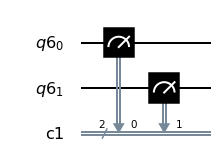

In [5]:
#set up rotation circuit 
rotation_qreg=QuantumRegister(2)
rotation_creg=ClassicalRegister(2)
rotation_circ=QuantumCircuit(rotation_qreg, rotation_creg)


#take a measurement of the qubit 
rotation_circ.measure(0,0)
rotation_circ.measure(1,1)
rotation_circ.draw(output='mpl')

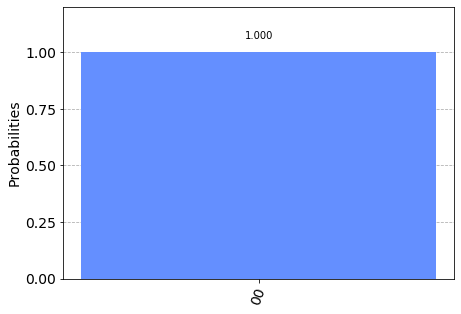

In [6]:
#we can run a M_simulation to get statevector of rotation circuit 

rot_job=execute(rotation_circ, M_simulator)
hist=rot_job.result().get_counts()


plot_histogram(hist)

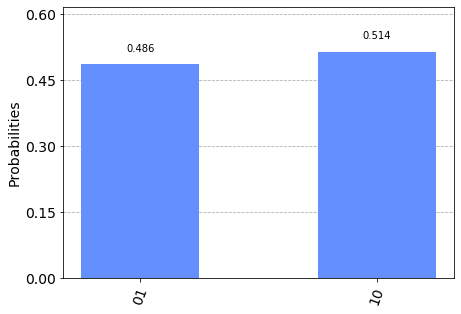

In [7]:
#rotate first qubit in x
rotation_circ.rx(pi/2, 0)
# and second qubit in y
rotation_circ.ry(pi, 1)
rotation_circ.cx(0,1)


rotation_circ.measure(0,0)
rotation_circ.measure(1,1)

rot_job=execute(rotation_circ, M_simulator)
hist=rot_job.result().get_counts()

plot_histogram(hist)

## Now we add Gradient Descent into the mix

## Things we need 

-Multiplier 

-Precision 

-Number of Iterations 

-Initial Guess 

-Gradient or derivative or slope (tricky bit)
                                
                
 
Lets think it out, we have a matrix that transforms our vector 

Action of Rx and Ry give us an output vector, so perhaps we can take the derivative of those? And those can be our costs

SO, I can define a dRx gate and dRy gate 


some psi can be defined on the bloch sphere as

$$ |\psi\rangle = cos(\frac{\theta}{2})|0\rangle + e^{i\phi}sin(\frac{\theta}{2})|1\rangle $$

We can define a $\frac{d\psi}{d\theta}$ 

$$ |\frac{d\psi}{d\theta}\rangle = \frac{-1}{2}sin(\frac{\theta}{2})|0\rangle + \frac{e^{i\phi}}{2}cos(\frac{\theta}{2})|1\rangle $$ 

At $\theta = 0$ we have

$$ |\psi\rangle = |0\rangle $$ 

and 

$$ |\frac{d\psi}{d\theta}\rangle = \frac{e^{i\phi}}{2}|1\rangle $$ 

This is our starting state (for now,  we will start with arbitrary states later in our treatment.)

# Translate Gradient Descent into something we can use 

In [8]:
# First we do basic Gradient Descent for some f(x) cost funtion \
# use its derivative f'(x) as the derivative_func

In [9]:
#need to have some gradient function
def derivative_function(theta): 
    pass #Place Holder right now 


In [10]:
# def gradient_descent(derivative_func, initial_guess, 
#                      multiplier=0.02, precision=0.001,
#                      max_iter=300):  
    
    
#     new=initial_guess
#     xlist=[new]
#     slopelist=[derivative_func(new)]
    
    
#     for n in range(max_iter): 
#         prev=new
#         gradient = derivative_func(prev)
#         new= prev - multiplier*gradient 

#         stepsize=abs(new-prev)

#         xlist.append(new)
#         slopelist.append(derivative_func(new))

#         if stepsize< precision: 
#             break 
#  # gradient descent 
# new=3 # variable 
# prev=0 
# step=0.1 
# precision=0.00001 # or step of descent 
# counter=0

# xlist=[new]
# slopelist=[grad(new)]
# for n in range(500): 
#     prev=new
#     gradient=grad(prev)
#     new=prev-step*gradient 
    
#     stepsize=abs(new-prev)
#     counter+=1
    
#     xlist.append(new)
#     slopelist.append(grad(new))
    
#     if stepsize< precision: 
#         break 
        
# print('local min: ', new)
# print('slope at local min: ', grad(new))
# print('f(x) val or cost at this point: ', f(new))
# print('counter: ' ,counter) #youll see we dont need to even go through that many times 
       

In [11]:
# now translate it a bit here to our QC needs 

In [12]:
def rx_ry_gradient_descent(derivative_function, theta_0=0, multiplier=0.1,
                            precisionsad=0.001, shots=100): 
    
    new_theta = theta_0
    xlist=[new_state]
    gradient_list=[derivative_function(theta)] #some function of theta 
    
    for i in range(shots): 
        old_theta=new_theta
        gradient=derivative_function(old_theta)
        new_theta = old_theta - multiplier*gradient
        
        #step_size=abs(new_theta - old_theta)
        
        xlist.append(new_theta)
        gradient_list.append(derivatrive_function(new_theta))
        
        
#         if step_size < precision: # may or may not need 
#             break # If we are already in the range of precision stop going 
        

# A working circuit this is what we are hoping for as a result of our gradient descent 


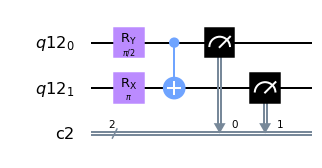

In [13]:
#THIS WORKS! This is what we are going for 


qreg=QuantumRegister(2)
creg=ClassicalRegister(2)
q = QuantumCircuit(qreg, creg)


q.rx(pi,1)
q.ry(pi/2,0)
q.cx(0,1)


q.measure(0,0)
q.measure(1,1)

q.draw(output='mpl') 




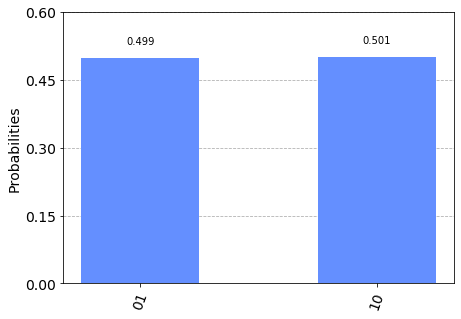

In [14]:
# The results dont lie! 
job=execute(q, M_simulator, shots=8192)
hist=job.result().get_counts()
plot_histogram(hist)



In [15]:
from qiskit.aqua.components.optimizers import AQGD # attempt their gradient descent # could be a good exercise 

In [16]:
def gradient_circuit(theta_x, theta_y): 
    '''
    SOME DOC STRING
    '''
    
    grad_qreg=QuantumRegister(2)
    grad_creg=ClassicalRegister(2)
    grad_qc = QuantumCircuit(qreg, creg)


    grad_qc.rx(theta_x,1)
    grad_qc.ry(theta_y,0)
    grad_qc.cx(0,1)


#     grad_qc.measure(0,0) #dont need measurements right now 
#     grad_qc.measure(1,1)
    
    return grad_qc
    

def gradient_circuit_measure(theta_x, theta_y, shots=4096): 
    '''
    SOME DOC STRING
    '''
    grad_qc=gradient_circuit(theta_x, theta_y)
    
    job=execute(grad_qc, M_simulator, shots=shots)
    hist=job.result().get_counts()
#     return plot_histogram(hist)
    return hist

In [17]:
gradient_circuit_measure(0,0) # make an initial circuit 


{'00': 4096}

In [18]:
grad_qc=gradient_circuit(pi, pi/2) #the right answer circuit for comparison

job=execute(grad_qc, M_simulator, shots=1000)
counts=job.result().get_counts()
counts #our way of measuring is getting a histogram and keeping track of counts 

counts['00']

1000

In [19]:
"""
Lets think of a tolerable range that will give us some leeway for our gradient descent to be finished. 

if counts['01'] and counts['10'] ~ shots/2 then we have our solution so shots/2 +- shots/20 , if shots=1000 then 
500 + or - 50 is kind of what I was thinking of 

"""

"\nLets think of a tolerable range that will give us some leeway for our gradient descent to be finished. \n\nif counts['01'] and counts['10'] ~ shots/2 then we have our solution so shots/2 +- shots/20 , if shots=1000 then \n500 + or - 50 is kind of what I was thinking of \n\n"

# Paramter shift


https://pennylane.ai/qml/glossary/parameter_shift.html

## Refer to the pennylane link and papers in final write up on project

### $$\nabla_\theta f(\theta)= \frac{1}{2} [f(\theta + \frac{\pi}{2}) - f(\theta - \frac{\pi}{2})] $$

derivation for Rotation Operators from pennylane  

The result for Ri matrices 

In [20]:
#  # gradient descent 
# new=3 # variable 
# prev=0 
# step=0.1 
# precision=0.00001 # or step of descent 
# counter=0

# xlist=[new]
# slopelist=[df(new)]
# for n in range(500): 
#     prev=new
#     gradient=df(prev)
#     new=prev-step*gradient 
    
#     stepsize=abs(new-prev)
#     counter+=1
    
#     xlist.append(new)
#     slopelist.append(df(new))
    
#     if stepsize< precision: 
#         break 
        
# print('local min: ', new)
# print('slope at local min: ', df(new))
# print('f(x) val or cost at this point: ', f(new))
# print('counter: ' ,counter) #youll see we dont need to even go through that many times 

# This was a failed attempt at writing a $f(\theta)$ and $\nabla f(\theta)$

In [21]:


# def quantum_function_rx(theta_x): #return expectation value 
        
#     grad_qreg=QuantumRegister(2)
#     grad_creg=ClassicalRegister(2)
#     grad_qc = QuantumCircuit(qreg, creg)


#     grad_qc.rx(theta_x,1) #on second qubit
#     grad_qc.ry(theta_y,0) # on first qubit
#     grad_qc.cx(0,1)
    
    
#     pass


# def quantum_function_ry(theta_y):
    
#     pass


# def grad_rx(theta_x): 
    
#     gradient_x=0.5*(quantum_function_rx(theta_x + (pi/2)) - quantum_function_rx(theta_x -(pi/2)))
    
#     return gradient_x


# def grad_ry(theta_y):
    
#     gradient_y=0.5*(quantum_function_ry(theta_y + (pi/2)) - quantum_function_ry(theta_y -(pi/2)))

#     return gradient_y

In [61]:
# can actually do it in one function for f(theta) and df(theta) we dont need one for x and y 

def quantum_function(theta_x, theta_y): 
    
    
    grad_qreg=QuantumRegister(2)
    grad_creg=ClassicalRegister(2)
    grad_qc = QuantumCircuit(qreg, creg)


    grad_qc.rx(theta_x,1) #on second qubit
    grad_qc.ry(theta_y,0) # on first qubit
    grad_qc.cx(0,1)
    
    
    job=execute(grad_qc, S_simulator, shots=8192)
    ket=job.result().get_statevector()
    
    state_q01 =ket[0].real
    state_q10=ket[1].real
    
    return state_q01, state_q10

def gradients(theta_x, theta_y):

    upper_theta_x=theta_x+(pi/2)
    upper_theta_y=theta_y-(pi/2)
    
    lower_theta_x=theta_x+(pi/2)
    lower_theta_y=theta_y-(pi/2) 
    
    upper_expectation_value_x, upper_expectation_value_y = quantum_function(upper_theta_x, upper_theta_y)
    
    lower_expectation_value_x, lower_expectation_value_y = quantum_function(lower_theta_x, lower_theta_y)
    
    
    gradient_x = 0.5 * (upper_expectation_value_x - lower_expectation_value_x)
    
    gradient_y = 0.5 * (upper_expectation_value_y - lower_expectation_value_y)
    
    return gradient_x, gradient_y

In [63]:
new_theta_x, new_theta_y  = pi , pi #correct is pi, pi/2 
prev_theta_x, prev_theta_y = 0 , 0
step = 0.0001
counter = 0 
max_iter = 100
precision = 0.000000001

theta_x_list = [new_theta_x] #for grahping later perhaps! 
theta_y_list = [new_theta_y]

gradient_x, gradient_y = gradients(new_theta_x, new_theta_y)

gradient_x_list = [gradient_x]
gradient_y_list = [gradient_y]

for n in range(max_iter): 
    prev_theta_x = new_theta_x
    prev_theta_y = new_theta_y
    
    gradient_x, gradient_y = gradients(prev_theta_x, prev_theta_y)
    
    new_theta_x = prev_theta_x - step * gradient_x
    new_theta_y = prev_theta_y - step * gradient_y
    
    stepsize_x = abs(new_theta_x - prev_theta_x)
    stepsize_y = abs(new_theta_y - prev_theta_y)
    
    counter+=1
    
    theta_x_list.append(new_theta_x)
    theta_y_list.append(new_theta_y)
    
    
    gradient_x, gradient_y = gradients(new_theta_x, new_theta_y)

    gradient_x_list.append(gradient_x)
    gradient_y_list.append(gradient_y)
    
#     if (stepsize_x and stepsize_y) < precision: 
#         break
        
print('local min: ', new_theta_x, new_theta_y)
print('slope at local min: ', gradients(new_theta_x, new_theta_y))
print('f(x) val or cost at this point: ', quantum_function(new_theta_x,new_theta_y ))
print('counter: ' ,counter) #youll see we dont need to even go through that many times 

local min:  3.141592653589793 3.141592653589793
slope at local min:  (0.0, 0.0)
f(x) val or cost at this point:  (-1.0, -6.123233995736766e-17)
counter:  100


In [24]:
gradients(pi/2, pi/4)

(0.0, 0.0)

In [25]:
def two(): 
    return 1,2 #can return two vars and initialize them 

In [26]:
x,y=two()

In [27]:
x

1

In [28]:
y

2

In [29]:
# from qiskit.aqua.operators import * 
# from cmath import * #get complex number a+bj notation to be read 

# theta_x = 0 
# theta_y = 0 
# exponent_for_rotation =(-0.5*theta_x*1j)*X
# rotation_x=CircuitOp()

In [30]:
# from qiskit.aqua.operators import * 

# operator_circuit=QuantumCircuit(2)
# operator_circuit.barrier()
# operator_circuit.ry(pi/2, 0)
# operator_circuit.rx(pi, 1)
# operator_circuit.cx(0,1)
# operator_circuit.barrier()

# op=CircuitOp(operator_circuit) #operator I am measuring 

# psi_dict={'01' :1}
# phi_dict={'10': 1}


# psi = CircuitStateFn.from_dict(psi_dict)
# phi = CircuitStateFn.from_dict(phi_dict)

# print(psi.adjoint().compose(op).compose(psi))
# print(phi.adjoint().compose(op).compose(phi))
# print('Find |10> :', psi.adjoint().compose(op).compose(psi).eval())
# print('Find |01> :' , phi.adjoint().compose(op).compose(phi).eval())

In [31]:
# print(psi.adjoint().compose(op).compose(psi))

In [32]:
# # Need to practice to understand this 
# testc=ClassicalRegister(1)
# testq=QuantumRegister(1)
# test=QuantumCircuit(testq, testc)
# test.x(0)
# test.h(0)

# op=CircuitOp(test)

# psi_dict={'0':1 }
# phi_dict={'1':1}

# psi = CircuitStateFn.from_dict(psi_dict)
# phi = CircuitStateFn.from_dict(phi_dict)

# print(psi.adjoint().compose(op).compose(psi))
# print(phi.adjoint().compose(op).compose(phi))
# print(phi)
# print('Find |10> :', psi.adjoint().compose(op).compose(psi).eval())
# print('Find |01> :' , phi.adjoint().compose(op).compose(phi).eval())

# test.measure(0,0)

# job=execute(test, M_simulator, shots=8192)
# hist=job.result().get_counts()
# plot_histogram(hist)

In [33]:
testc=ClassicalRegister(1)
testq=QuantumRegister(1)
test=QuantumCircuit(testq, testc)
# test.x(0)
test.h(0)

# test.measure(0,0) # can not forget to get the statevector right you
# can not measure 

#nice little reminder on how to get kets 

job=execute(test, S_simulator, shots=1)
ket=job.result().get_statevector()
print(ket)

[0.70710678+0.j 0.70710678+0.j]


In [45]:

qreg=QuantumRegister(2)
creg=ClassicalRegister(2)
q = QuantumCircuit(qreg, creg)



q.ry(pi/2,0)
q.rx(pi,1)
q.barrier()
q.cx(0,1)

job=execute(q, S_simulator, shots=1)
ket=job.result().get_statevector()
# print(ket)

from qiskit.quantum_info import Statevector

psi=Statevector(ket)

print(psi.probabilities(decimals=3)) # another way to get a representation of our probablities 
#returns an ndarray 

for i in psi.probabilities(decimals=3): 
    print(i)

[0.  0.5 0.5 0. ]
0.0
0.5
0.5
0.0


In [248]:
def quantum_function_2nd(theta_x, theta_y): 

    qreg=QuantumRegister(2)
    creg=ClassicalRegister(2)
    q = QuantumCircuit(qreg, creg)

    q.ry(theta_y,0)
    q.rx(theta_x,1)
    q.barrier()
    q.cx(0,1)

    job=execute(q, S_simulator, shots=8192)
    ket=job.result().get_statevector()
    

    psi=Statevector(ket)
    probabilities = psi.probabilities(decimals=5)
    
    state_q01 = probabilities[1]
    state_q10 = probabilities[2]
    
    return state_q01, state_q10



def gradients_2nd(theta_x, theta_y): 
    
    upper_theta_x=theta_x+(pi/2)
    upper_theta_y=theta_y+(pi/2)
    
    lower_theta_x=theta_x-(pi/2)
    lower_theta_y=theta_y-(pi/2) 
    
    #introduce dummy variables!
#     upper_expectation_value_x, dummy_y = quantum_function_2nd(upper_theta_x, theta_y)
#     dummy_x, upper_expectation_value_y = quantum_function_2nd(theta_x, upper_theta_y)
    
    #this approach of optimizing both did not work 
#     upper_expectation_value_x, upper_expectation_value_y = quantum_function_2nd(upper_theta_x, upper_theta_y)
    
#     lower_expectation_value_x, lower_expectation_value_y = quantum_function_2nd(lower_theta_x, lower_theta_y)
    
#     lower_expectation_value_x, dummy_y = quantum_function_2nd(lower_theta_x, theta_y)
#     dummy_x, lower_expectation_value_y = quantum_function_2nd(theta_x, lower_theta_y)
    
    
    
    upper_expectation_value_x, duumy = quantum_function_2nd(upper_theta_x, 0)
    dummy, upper_expectation_value_y = quantum_function_2nd(0, upper_theta_y)
    
    lower_expectation_value_x, dummy = quantum_function_2nd(lower_theta_x, 0)
    dummy, lower_expectation_value_y = quantum_function_2nd(0, lower_theta_y)

    
#     print(upper_expectation_value_x, upper_expectation_value_y, lower_expectation_value_x, lower_expectation_value_y)
    
    gradient_x = 0.5 * (upper_expectation_value_x - lower_expectation_value_x)
    
    gradient_y = 0.5 * (upper_expectation_value_y - lower_expectation_value_y)
    
    return gradient_x, gradient_y
    

In [249]:
theta_x=pi
theta_y=pi/2

grad_qreg=QuantumRegister(2)
grad_creg=ClassicalRegister(2)
grad_qc = QuantumCircuit(qreg, creg)


grad_qc.rx(theta_x,1) #on second qubit
grad_qc.ry(theta_y,0) # on first qubit
grad_qc.cx(0,1)


job=execute(grad_qc, S_simulator, shots=8192)
ket=job.result().get_statevector()

state_q01 =ket[1].imag # I was not getting the right components before oh man 
state_q10=ket[2].imag

print(ket)
print(state_q01)

[4.32978028e-17+0.j         4.32978028e-17-0.70710678j
 4.32978028e-17-0.70710678j 4.32978028e-17+0.j        ]
-0.7071067811865476


In [250]:
quantum_function_2nd(pi, pi/2) # THATS NICE 

(0.5, 0.5)

In [251]:
gradients_2nd(pi, pi/2) # non zero gradeints yay!

# taking note my gradient is not 0 at the desired point.... so I have to edit my gradient function 



(0.0, 0.0)

In [239]:
quantum_function_2nd(3*pi/2, pi/2) #upper x

(0.25, 0.25)

In [240]:
quantum_function_2nd(pi/2, pi/2) #lower x

(0.25, 0.25)

In [241]:
quantum_function_2nd(pi, pi) #upper y

(1.0, 0.0)

In [243]:
quantum_function_2nd(pi,0) #lower y

(0.0, 1.0)

In [244]:
quantum_function_2nd(0, pi) #just y?

(0.0, 0.0)

In [245]:
quantum_function_2nd(0,0)

(0.0, 0.0)

In [246]:
quantum_function_2nd(3*pi/2,0)

(0.0, 0.5)

In [247]:
quantum_function_2nd(pi/2, 0)

(0.0, 0.5)

In [260]:
gradients_2nd(0,0)

(0.0, 0.0)

In [267]:
new_theta_x, new_theta_y  = 0, pi/2
# prev_theta_x, prev_theta_y = 0 , 0
step = .01
counter = 0 
max_iter = 200
# precision = 0.00001

# theta_x_list = [new_theta_x] #for grahping later perhaps! 
# theta_y_list = [new_theta_y]

# gradient_x, gradient_y = gradients_2nd(new_theta_x, new_theta_y)

# gradient_x_list = [gradient_x]
# gradient_y_list = [gradient_y]

for n in range(max_iter): 
    prev_theta_x = new_theta_x
    prev_theta_y = new_theta_y
    
    gradient_x, gradient_y = gradients_2nd(prev_theta_x, prev_theta_y)
    
    new_theta_x = prev_theta_x - (step * gradient_x)
    new_theta_y = prev_theta_y - (step * gradient_y)
    
#     stepsize_x = abs(new_theta_x - prev_theta_x)
#     stepsize_y = abs(new_theta_y - prev_theta_y)
    
    counter+=1
    
#     theta_x_list.append(new_theta_x)
#     theta_y_list.append(new_theta_y)
    
    
#     gradient_x, gradient_y = gradients_2nd(new_theta_x, new_theta_y)

#     gradient_x_list.append(gradient_x)
#     gradient_y_list.append(gradient_y)
    
#     if (stepsize_x and stepsize_y) < precision: 
#         break
        
print('local min: ', new_theta_x, new_theta_y)
print('slope at local min: ', gradients_2nd(new_theta_x, new_theta_y))
print('f(x) val or cost at this point: ', quantum_function_2nd(new_theta_x,new_theta_y ))
print('counter: ' ,counter) #youll see we dont need to even go through that many times 

local min:  0.0 1.5707963267948966
slope at local min:  (0.0, 0.0)
f(x) val or cost at this point:  (0.0, 0.0)
counter:  200


In [268]:
gradients_2nd(pi/4, pi/3)

(0.0, 0.0)

In [269]:
quantum_function_2nd(pi/2,0)

(0.0, 0.5)

In [271]:
quantum_function_2nd(-pi/2, 0)

(0.0, 0.5)

In [272]:
quantum_function_2nd(0, -pi/2)

(0.0, 0.0)

In [273]:
quantum_function_2nd(0, pi/2)

(0.0, 0.0)

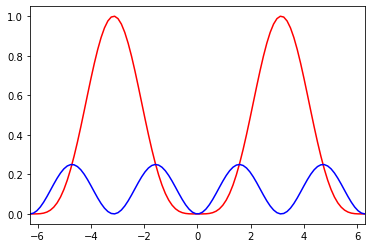

In [171]:
# plt.xlim(-2*pi, 2*pi)
# x1=np.linspace(start=-2*pi, stop=2*pi, num = 100)

# prob_01_list=[]
# prob_10_list=[]

# for i in x1: 
#     prob_01, prob_10 =quantum_function_2nd(i, i)
    
#     prob_01_list.append(prob_01)
#     prob_10_list.append(prob_10)


# plt.plot(x1, prob_01_list, c='r')
# plt.plot(x1, prob_10_list, c='b')

# plt.show() # i need a 3d picture 

In [193]:
# theta_x=np.linspace(start=-2*pi, stop=2*pi, num = 100)
# theta_y=np.linspace(start=-2*pi, stop=2*pi, num = 100)

# theta_x, theta_y = np.meshgrid(theta_x, theta_y)

# def f(x,y): 
#     x,y=quantum_function_2nd(x,y)
#     return x

In [262]:
# fig = plt. figure(figsize=[10,10])
# ax=fig.gca(projection='3d')

# prob_01_list=[]
# prob_10_list=[]

# for i in x1: 
#     prob_01, prob_10 =quantum_function_2nd(i, i)
    
#     prob_01_list.append(prob_01)
#     prob_10_list.append(prob_10)

# prob_01=np.array(prob_01_list)
# # print(prob_01)
# # prob_01.reshape(100,100)
# # print(prob_01)
# ax.plot_surface(theta_x, theta_y, 
#                 f(theta_x, theta_y))

# plt.show()

# The gradeints are completely wrong dude 

In [264]:
def quantum_function_2nd(theta_x, theta_y, shots=1000): 

    qreg=QuantumRegister(2)
    creg=ClassicalRegister(2)
    q = QuantumCircuit(qreg, creg)

    q.ry(theta_y,0)
    q.rx(theta_x,1)
    q.barrier()
    q.cx(0,1)

    job=execute(q, S_simulator, shots=shots)
    ket=job.result().get_statevector()
    

    psi=Statevector(ket)
    probabilities = psi.probabilities(decimals=8)
    
    state_q01 = probabilities[1]
    state_q10 = probabilities[2]
    
    return state_q01, state_q10



def gradients_2nd(theta_x, theta_y): 
    
    upper_theta_x=theta_x+(pi/2)
    upper_theta_y=theta_y+(pi/2)
    
    lower_theta_x=theta_x-(pi/2)
    lower_theta_y=theta_y-(pi/2) 
    
    #introduce dummy variables!
#     upper_expectation_value_x, dummy_y = quantum_function_2nd(upper_theta_x, theta_y)
#     dummy_x, upper_expectation_value_y = quantum_function_2nd(theta_x, upper_theta_y)
    
    #this approach of optimizing both did not work 
#     upper_expectation_value_x, upper_expectation_value_y = quantum_function_2nd(upper_theta_x, upper_theta_y)
    
#     lower_expectation_value_x, lower_expectation_value_y = quantum_function_2nd(lower_theta_x, lower_theta_y)
    
#     lower_expectation_value_x, dummy_y = quantum_function_2nd(lower_theta_x, theta_y)
#     dummy_x, lower_expectation_value_y = quantum_function_2nd(theta_x, lower_theta_y)
    
    
    
    upper_expectation_value_x, duumy = quantum_function_2nd(upper_theta_x, 0)
    dummy, upper_expectation_value_y = quantum_function_2nd(0, upper_theta_y)
    
    lower_expectation_value_x, dummy = quantum_function_2nd(lower_theta_x, 0)
    dummy, lower_expectation_value_y = quantum_function_2nd(0, lower_theta_y)

    
#     print(upper_expectation_value_x, upper_expectation_value_y, lower_expectation_value_x, lower_expectation_value_y)
    
    gradient_x = 0.5 * (upper_expectation_value_x - lower_expectation_value_x)
    
    gradient_y = 0.5 * (upper_expectation_value_y - lower_expectation_value_y)
    
    return gradient_x, gradient_y
    

In [369]:
# thrid try is the charm maybe if I do them seperately 

def q3x(theta_x, shots=1000): 
    
    qreg=QuantumRegister(2)
    creg=ClassicalRegister(2)
    q = QuantumCircuit(qreg, creg)

    q.ry(0,0)
    q.rx(theta_x,1)
    q.barrier()
    q.cx(0,1)
    
    job=execute(q, S_simulator, shots=shots)
    ket=job.result().get_statevector()
    

    psi=Statevector(ket)
    probabilities = psi.probabilities(decimals=8)
    
    state_q00=probabilities[0]
    state_q01 = probabilities[1]
    state_q10 = probabilities[2]
    state_q11 = probabilities[3]
    
#     return psi, state_q01, state_q10
    return probabilities

def q3y(theta_y, shots=1000): 
    
    qreg=QuantumRegister(2)
    creg=ClassicalRegister(2)
    q = QuantumCircuit(qreg, creg)

    q.ry(theta_y,0)
    q.rx(0,1)
    q.barrier()
    q.cx(0,1)
    
    job=execute(q, S_simulator, shots=shots)
    ket=job.result().get_statevector()
    

    psi=Statevector(ket)
    probabilities = psi.probabilities(decimals=8)
    
    state_q01 = probabilities[1]
    state_q10 = probabilities[2]
    
#     return psi, state_q01, state_q10
    return probabilities

def gx(theta_x): 
    

    gx=0.5 * (q3x(theta_x+pi/2)-q3x(theta_x-pi/2))
    
    return gx

def gy(theta_y): 
    
    gy=0.5 * (q3y(theta_x+pi/2)-q3y(theta_y-pi/2))
    
    return gy

In [370]:
q3x(pi)

array([0., 0., 1., 0.])

In [371]:
q3y(pi/2)

array([0.5, 0. , 0. , 0.5])

In [367]:
gx(pi)

0.0

In [368]:
gy(pi/2)

0.0

In [357]:
gy(pi/16)

0.0

In [359]:
new_theta_x, new_theta_y  = pi/4, pi/4
step = .01
counter = 0 
max_iter = 500


for n in range(max_iter): 
    prev_theta_x = new_theta_x
    prev_theta_y = new_theta_y
    
    gradient_x = gx(new_theta_x) 
    gradient_y = gy(new_theta_y)
    
    new_theta_x = prev_theta_x - (step * gradient_x)
    new_theta_y = prev_theta_y - (step * gradient_y)
    
    counter+=1
    
print('local min: ', new_theta_x, new_theta_y)
print('slope at local min: ', gx(new_theta_x), gy(new_theta_y))
print('f(x) val or cost at this point: ', q3x(new_theta_x), q3y(new_theta_y))
print('counter: ' ,counter) #youll see we dont need to even go through that many times 

local min:  0.06757732619744813 0.7853981633974483
slope at local min:  0.033762949999999986 0.0
f(x) val or cost at this point:  0.00114124 0.0
counter:  500


In [378]:
qreg=QuantumRegister(2)
creg=ClassicalRegister(2)
q = QuantumCircuit(qreg, creg)
shots=1000
q.ry(pi/2,0)
q.rx(pi,1)
q.barrier()
q.cx(0,1)

job=execute(q, S_simulator, shots=shots)
ket=job.result().get_statevector()


psi=Statevector(ket)
probabilities = psi.probabilities(decimals=8)

state_q01 = probabilities[1]
state_q10 = probabilities[2]

print(psi)
print(state_q01, state_q10)

print(probabilities)
print(psi.measure())

Statevector([4.32978028e-17+0.j        , 4.32978028e-17-0.70710678j,
             4.32978028e-17-0.70710678j, 4.32978028e-17+0.j        ],
            dims=(2, 2))
0.5 0.5
[0.  0.5 0.5 0. ]
('10', Statevector([0.000000e+00+0.j, 0.000000e+00+0.j, 6.123234e-17-1.j,
             0.000000e+00+0.j],
            dims=(2, 2)))


In [ ]:
# ok last try inscribe ry and cx as QCircuit and then use 
#statevector().expectationvalue



In [387]:
 #thrid try is the charm maybe if I do them seperately 

def q4x(theta_x, shots=1000): 
    
    qreg=QuantumRegister(2)
    creg=ClassicalRegister(2)
    q = QuantumCircuit(qreg, creg)

    
    q.rx(theta_x,1)
    q.barrier()
    
    opqreg=QuantumRegister(2)
    opcreg=ClassicalRegister(2)
    op=QuantumCircuit(opqreg, opcreg)
    
    op.ry(0,0)
    op.cx(0,1)
    
    job=execute(q, S_simulator, shots=shots)
    ket=job.result().get_statevector()
    

    psi=Statevector(ket)
 
    val=psi.expectation_value(op)
    return val

def q4y(theta_y, shots=1000): 
    
    qreg=QuantumRegister(2)
    creg=ClassicalRegister(2)
    q = QuantumCircuit(qreg, creg)

    
    q.ry(theta_y,0)
    q.barrier()
    
    opqreg=QuantumRegister(2)
    opcreg=ClassicalRegister(2)
    op=QuantumCircuit(opqreg, opcreg)
    
    op.rx(0,1)
    op.cx(0,1)
    
    job=execute(q, S_simulator, shots=shots)
    ket=job.result().get_statevector()
    

    psi=Statevector(ket)
 
    val=psi.expectation_value(op)
    return val

def gx(theta_x): 
    

    gx=0.5 * (q4x(theta_x+pi/2)-q4x(theta_x-pi/2))
    
    return gx

def gy(theta_y): 
    
    gy=0.5 * (q4y(theta_x+pi/2)-q4y(theta_y-pi/2))
    
    return gy

In [397]:
q4x(pi)

(1+0j)

In [398]:
q4y(pi/2)

(0.5000000000000001+0j)

In [399]:
gx(pi)

0j

In [400]:

gy(pi/2)

(-0.24999999999999994+0j)

In [421]:
def q5(theta_x, theta_y): 
    
    qreg=QuantumRegister(2)
    creg=ClassicalRegister(2)
    q = QuantumCircuit(qreg, creg)

    
    q.rx(theta_x,1)
    q.ry(theta_y,0)
    q.barrier()
    
    opqreg=QuantumRegister(2)
    opcreg=ClassicalRegister(2)
    op=QuantumCircuit(opqreg, opcreg)
    
    op.cx(0,1)
    
    job=execute(q, S_simulator, shots=shots)
    ket=job.result().get_statevector()
    

    psi=Statevector(ket)
 
    val=psi.expectation_value(op)
    return val.real

def grad5(theta_x, theta_y): 
    
    g=0.5*(q5(theta_x+pi/2, theta_y+pi/2)-q5(theta_x-pi/2, theta_y-pi/2))
    
    return g

In [422]:

q5(pi, pi/2)

0.5000000000000001

In [423]:
grad5(0 ,0)

0.0

In [425]:
new_theta_x, new_theta_y  = pi/2, pi/4
step = .01
counter = 0 
max_iter = 500


for n in range(max_iter): 
    prev_theta_x = new_theta_x
    prev_theta_y = new_theta_y
    
    gradient=grad5(prev_theta_x, prev_theta_y)
    
    
    new_theta_x = prev_theta_x - (step * gradient)
    new_theta_y = prev_theta_y - (step * gradient)
    
    counter+=1
    
print('local min: ', new_theta_x, new_theta_y)
print('slope at local min: ', grad5(new_theta_x, new_theta_y))
print('f(x) val or cost at this point: ', q5(new_theta_x,new_theta_y))
print('counter: ' ,counter) #youll see we dont need to even go through that many times 

local min:  3.5363077807270846 2.750909617329632
slope at local min:  -0.1904100364065021
f(x) val or cost at this point:  0.037675419174283374
counter:  500
